**Mount Google Drive**

Start by mounting your google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install requirements**

Do not forget to install needed packages as well!

In [2]:
!pip install datasets
!pip install matplotlib
!pip install numpy
!pip install torch
!pip install tqdm

     |████████████████████████████████| 325 kB 7.2 MB/s 
     |████████████████████████████████| 1.1 MB 58.5 MB/s 
     |████████████████████████████████| 136 kB 75.0 MB/s 
     |████████████████████████████████| 77 kB 8.5 MB/s 
     |████████████████████████████████| 212 kB 72.3 MB/s 
     |████████████████████████████████| 127 kB 73.8 MB/s 
     |████████████████████████████████| 271 kB 73.6 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 53.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


**Using Colab GPU**

To use Google Colab's GPU, `click Runtime > Change runtime type` and select GPU under `Hardware`.

Running `torch.cuda.is_available()` should now return `True`. Alternatively, you can also use `!nvidia-smi` to check the GPU you're using.

In [3]:
import torch
torch.cuda.is_available()

True

**Navigate to Root Project Folder**

Navigate to the root folder of your project using `sys`. For example, if your project is in "Google Drive/Colab Notebooks", then type in `/content/drive/MyDrive/Colab Notebooks`.

All your py files should be inside this root folder, so you can easily call functions within them.

In [4]:
import sys
project_root = '/content/drive/MyDrive/Colab Notebooks/building blocks'
sys.path.append(project_root)

**Navigating subfolders**

If your py files are located within a folder of your root, append said folder with `sys`. After which, you can now import functions within said files normally.

In [5]:
import os
sys.path.append(os.path.join(project_root, "data"))

from data import load_dataset
trainloader, testloader = load_dataset(batch=16)
batch = next(iter(testloader))
print(batch['img'].shape)


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


Reusing dataset cifar10 (/root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


torch.Size([16, 3, 32, 32])


In [6]:
import numpy as np

b,c,h,w = batch['img'].shape
input_dim = c*h*w
num_class = 10

print("input size: {}, num_class: {}".format(input_dim, num_class))

input size: 3072, num_class: 10


In [7]:
sys.path.append(os.path.join(project_root, "models"))

from model import MLP
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(input_dim, num_class)
model.to(device)
print(model)

MLP(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


**Set-up Training Configs and Functions**

In [8]:
import torch.nn as nn

num_epochs = 1
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)
optimizer = torch.optim.Adam(model.parameters())

In [9]:
def accuracy(y_p, y):
    y_p = torch.argmax(y_p, dim=1) # We get top class
    acc = y_p.eq(y).sum()          # Compare it with ground truth
    acc = acc/y.shape[0]           # Get acc for the batch
    return acc

In [10]:
from tqdm import tqdm

model.train()
for epoch in range(num_epochs):
    epoch_loss, epoch_acc = 0, 0
    for idx, data in tqdm(enumerate(trainloader)):
        x,y = data['img'].to(device), data['label'].to(device) 
        
        optimizer.zero_grad()
        y_p = model(x)
        
        loss = criterion(y_p, y)
        acc = accuracy(y_p, y)
        
        loss.backward()
        optimizer.step()
        
        epoch_acc += acc
        epoch_loss += loss
        
    epoch_acc /= len(trainloader)
    epoch_loss /= len(trainloader)
    print("Epoch {}, Accuracy: {}, Loss: {}".format(epoch, epoch_acc, epoch_loss))

3125it [00:26, 117.74it/s]

Epoch 0, Accuracy: 0.3274799883365631, Loss: 1.8446204662322998


In [11]:
import matplotlib.pyplot as plt

labels = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
          5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

def display_outputs(x, y_p, y):
    num_outputs = x.shape[0]
    y_p = torch.argmax(y_p, dim=1)
    
    for i in range(num_outputs):
        image = x[i].permute((1,2,0)).cpu()
        plt.imshow(image)
        plt.show()
        print("Ground Truth: {}[{}], Predicted: {}[{}]".format(
            labels[y[i].item()], y[i], labels[y_p[i].item()], y_p[i]))

0it [00:00, ?it/s]

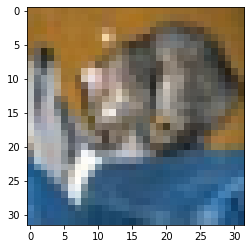

Ground Truth: cat[3], Predicted: frog[6]


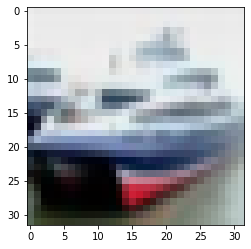

Ground Truth: ship[8], Predicted: ship[8]


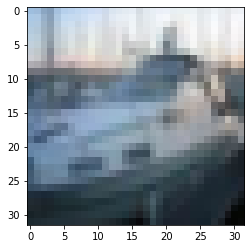

Ground Truth: ship[8], Predicted: ship[8]


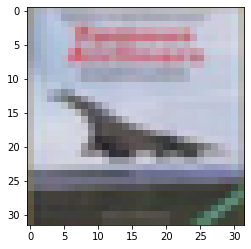

Ground Truth: airplane[0], Predicted: ship[8]


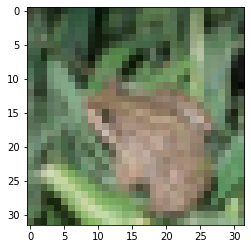

Ground Truth: frog[6], Predicted: frog[6]


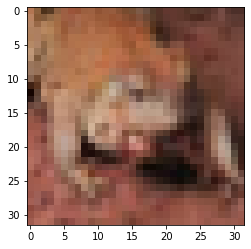

Ground Truth: frog[6], Predicted: frog[6]


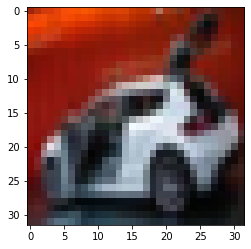

Ground Truth: automobile[1], Predicted: cat[3]


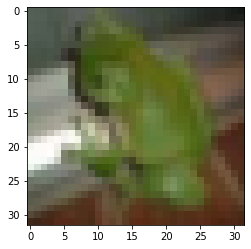

Ground Truth: frog[6], Predicted: deer[4]


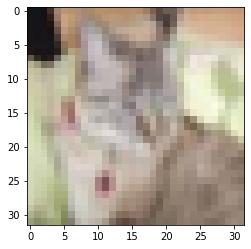

Ground Truth: cat[3], Predicted: frog[6]


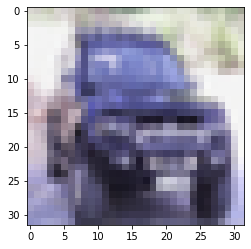

Ground Truth: automobile[1], Predicted: automobile[1]


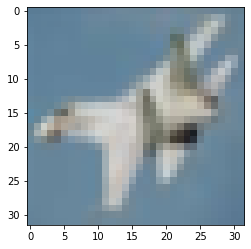

Ground Truth: airplane[0], Predicted: ship[8]


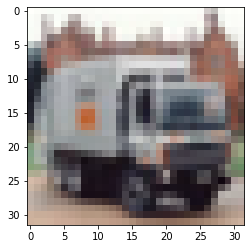

Ground Truth: truck[9], Predicted: truck[9]


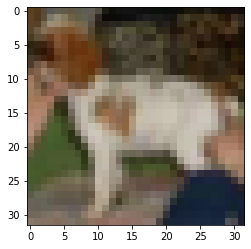

Ground Truth: dog[5], Predicted: frog[6]


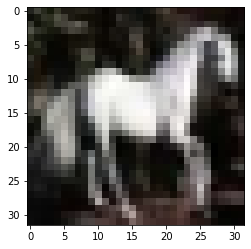

Ground Truth: horse[7], Predicted: horse[7]


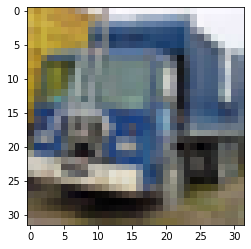

Ground Truth: truck[9], Predicted: truck[9]


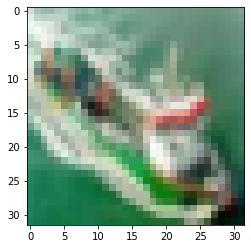

1it [00:01,  1.97s/it]

Ground Truth: ship[8], Predicted: bird[2]


625it [00:07, 88.62it/s] 

Test accuracy: 0.36649999022483826


In [12]:
model.eval()

test_acc = 0
for idx, data in tqdm(enumerate(testloader)):
    x,y = data['img'].to(device), data['label'].to(device)
    y_p = model(x)
    
    if idx==0: display_outputs(x, y_p, y)
    acc = accuracy(y_p, y)
    test_acc += acc

test_acc /= len(testloader) 
print("Test accuracy: {}".format(test_acc))